Load textures and cochleogram data 
---------------------------------------

In [69]:
import numpy as np
import os
npzfilename=os.path.join('airplan','rawFeatures.npz')
dataraw= np.load(npzfilename) 
dataraw=dataraw['arr_0'].item()
dataraw.keys()

['Tf', 'E', 'Pf', 'Ts', 'Ps']

Plotting
---------

Activating plotting magic


Plot one of texture features

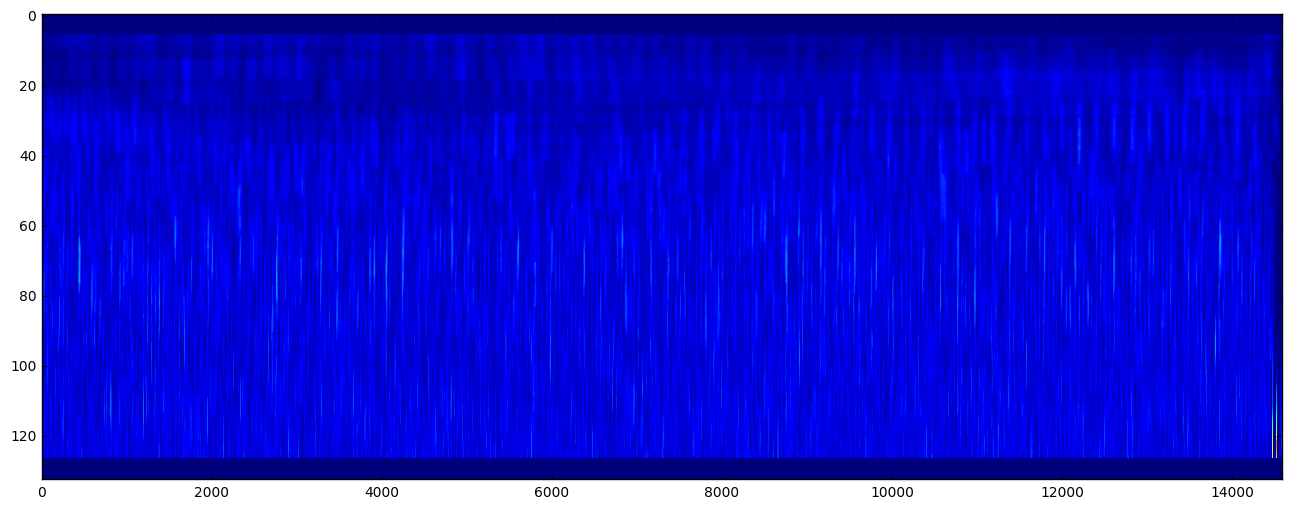

In [70]:
f=plt.figure(figsize=(16,6,))
ax = f.add_subplot(1,1,1)
ax.imshow(dataraw['Tf'], interpolation='nearest',aspect='auto')
plt.show()


Load the PTN data
-------------------


In [71]:
npzfilename=os.path.join('AnalysisOfGygiDataset.npz')
PTNdata= np.load(npzfilename) 
PTNdata=PTNdata['arr_0'].item()
#PTNdata.keys()

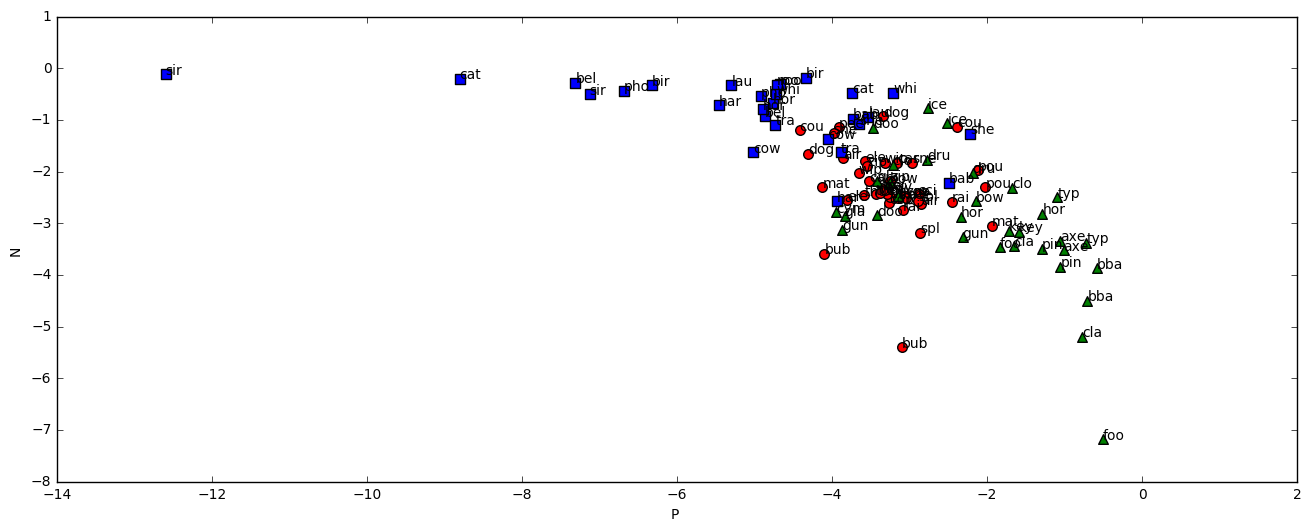

In [132]:
f=plt.figure(figsize=(16,6,))
ax = f.add_subplot(1,1,1)
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']

#ax.plot(xs, ys,'.' )

for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange], c=typecolor, marker=typemarker,s=48)


for label, x, y in zip(PTNdata['labels'], xs,ys):
    ax.text(x, y, label[:3], None)    

ax.set_xlabel('P ')
ax.set_ylabel('N ')


plt.show()

Display the raw data in a 3d plot

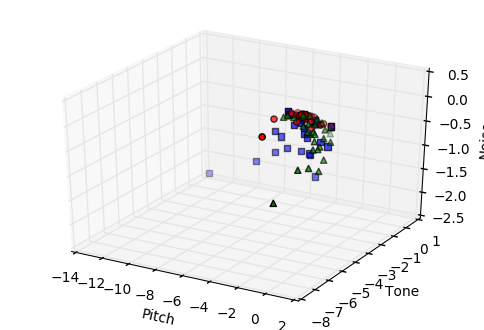

In [115]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
#for a 3d plot the projection needs to be set to 3d
ax = fig.add_subplot(111, projection='3d')

#xs, ys and zs are set to pitch, tone and noise data values respectively
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']
zs=PTNdata['N_logsumE_off_FS']

#for each data point the data is read and plotted with the respective colour
for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange],zs[typerange], c=typecolor, marker=typemarker)


#Defines the axis labels on the plot
ax.set_xlabel('Pitch')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')

#used to show the plot in output
plt.show()

Histogram visualiasion of raw input data

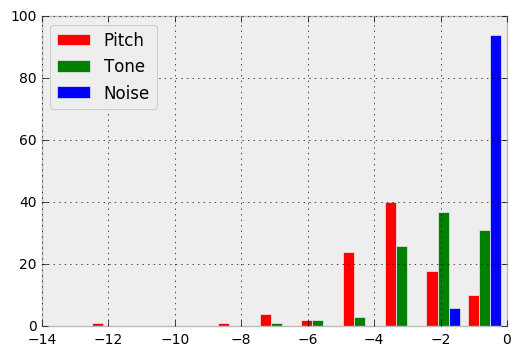

In [178]:
import pylab as P



#set the values for the histogram 
P.hist( [xs,ys,zs], 10,  histtype='bar', color=['red', 'green', 'blue'],
label=['Pitch', 'Tone', 'Noise'])

P.title('Histogram Representation of raw noise data')
P.ylabel('% Occurances')
P.xlabel('LogSum')

#display legend of upper left of plot area
P.legend(loc='upper left')


#show the plot
P.show()

Adding k-means algorithm from scipy for pitch vs tone data

In [ ]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# merge data into one array
data =np.vstack((xs,ys))
data = np.array([xs,ys]).T

centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)

plot(data[idx==0,0],data[idx==0,1],'o',
     data[idx==1,0],data[idx==1,1],'o',
     data[idx==2,0],data[idx==2,1],'o') 
plot(centroids[:,0],centroids[:,1],'sm',markersize=10)
show()

3D plot of the clustered data

In [ ]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq


#sets the axes to 3d
fig = plt.figure()
ax=Axes3D(fig)


# merge data into one array
data =np.vstack((xs,ys,zs))
data = np.array([xs,ys,zs]).T


#calculate the centeriods 
centroids,_ = kmeans(data,3)

#assign each data point to a group based on the centeriods that they are closet to in distance
idx,_ = vq(data,centroids)


#plot the data values in the 3 seperate clusters
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],'ob')
plot(data[idx==1,0],data[idx==1,1],data[idx==1,2],'or')
plot(data[idx==2,0],data[idx==2,1],data[idx==2,2],'og')

#set axis labels
ax.set_xlabel('Pulse')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')

#plot the centeroids
plot(centroids[:,0],centroids[:,1],centroids[:,2],'sm',markersize=10)
show()